<a href="https://colab.research.google.com/github/gzanellato-ia/burrowing_parrot/blob/main/burrowing_parrots_DeepLabv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://drive.google.com/uc?export=view&id=1CHoxaz7sslroSHaP8IINZtgp6yuVrKZM' width=200 align='right'>

#**Automatic counting of Burrowing Parrot nests**
##Parrot colony in El Cóndor
##Río Negro Province, Argentina

<img src='https://drive.google.com/uc?export=view&id=1YeDCnNV4zKYsjiz_x08wCWAOPH3NaxxV' width=200 align='right'>

##### Gabriel Zanellato - Juan Masello - Gabriel Pagnossin

#### Marzo 2022

<img src='https://drive.google.com/uc?export=view&id=14Qs7erhsP5T1V8KGpsfxEZuKFMnjHRVX' width=300>

## Implementation of the DeepLabv3 architecture

Paper: https://doi.org/10.48550/arXiv.1706.05587

Ref: https://www.youtube.com/watch?v=4LhUpCWBzT8

Ref: https://github.com/nikhilroxtomar/Human-Image-Segmentation-with-DeepLabV3Plus-in-TensorFlow

In [ ]:
# Copyright: Gabriel Zanellato, 2022
# Based on Lempitsky (2010), Fiaschi (2012), Xie(2018), Ronneberger (2015), Waithe (2017), Zhang et al. (2017),
# Liang-Chieh Chen et al. (2017)

from google.colab import drive
drive.mount('/content/drive/')

BASE_FOLDER = '/content/drive/My Drive/Data_loros/'

Mounted at /content/drive/


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Aug 24 14:25:26 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from sklearn.model_selection import train_test_split
import os

## Importing the images containing the nests and the points marked by the expert

In [ ]:
lista_carpetas = ['parches', 'puntos']

nombres_imagenes  = os.listdir(BASE_FOLDER + '/' + lista_carpetas[0])
nombres_puntos    = os.listdir(BASE_FOLDER + '/' + lista_carpetas[1])

print(lista_carpetas[0])
print(nombres_imagenes)
print('')
print(lista_carpetas[1])
print(nombres_puntos)


# Shuffling
import random

random.seed(0)
random.shuffle(nombres_imagenes)

print("\nshuffled images")
print(nombres_imagenes)

parches
['parche_001.png', 'parche_002.png', 'parche_008.png', 'parche_004.png', 'parche_011.png', 'parche_007.png', 'parche_013.png', 'parche_005.png', 'parche_012.png', 'parche_009.png', 'parche_003.png', 'parche_006.png', 'parche_014.png', 'parche_010.png', 'parche_017.png', 'parche_020.png', 'parche_016.png', 'parche_018.png', 'parche_021.png', 'parche_015.png', 'parche_019.png', 'parche_023.png', 'parche_026.png', 'parche_025.png', 'parche_024.png', 'parche_022.png', 'parche_027.png', 'parche_029.png', 'parche_034.png', 'parche_032.png', 'parche_030.png', 'parche_031.png', 'parche_036.png', 'parche_035.png', 'parche_033.png', 'parche_028.png', 'parche_037.png', 'parche_041.png', 'parche_040.png', 'parche_044.png', 'parche_042.png', 'parche_043.png', 'parche_038.png', 'parche_039.png', 'parche_046.png', 'parche_045.png', 'parche_047.png', 'parche_050.png', 'parche_052.png', 'parche_054.png', 'parche_056.png', 'parche_055.png', 'parche_053.png', 'parche_051.png', 'parche_049.png', '

In [ ]:
# Importing the images

imagen = []
puntos = []

qty = len(nombres_imagenes)

for i in range(qty):

    print('Importing image #', i+1, 'of', str(qty))
    imagen.append(io.imread(BASE_FOLDER + '/' + lista_carpetas[0] + '/' + nombres_imagenes[i]))
    puntos.append(io.imread(BASE_FOLDER + '/' + lista_carpetas[1] + '/' + nombres_imagenes[i]))

imagen = np.array(imagen)/255.
puntos = np.array(puntos)/255.

print(imagen.shape)
print(puntos.shape)

Importing image # 1 of 312
Importing image # 2 of 312
Importing image # 3 of 312
Importing image # 4 of 312
Importing image # 5 of 312
Importing image # 6 of 312
Importing image # 7 of 312
Importing image # 8 of 312
Importing image # 9 of 312
Importing image # 10 of 312
Importing image # 11 of 312
Importing image # 12 of 312
Importing image # 13 of 312
Importing image # 14 of 312
Importing image # 15 of 312
Importing image # 16 of 312
Importing image # 17 of 312
Importing image # 18 of 312
Importing image # 19 of 312
Importing image # 20 of 312
Importing image # 21 of 312
Importing image # 22 of 312
Importing image # 23 of 312
Importing image # 24 of 312
Importing image # 25 of 312
Importing image # 26 of 312
Importing image # 27 of 312
Importing image # 28 of 312
Importing image # 29 of 312
Importing image # 30 of 312
Importing image # 31 of 312
Importing image # 32 of 312
Importing image # 33 of 312
Importing image # 34 of 312
Importing image # 35 of 312
Importing image # 36 of 312
I

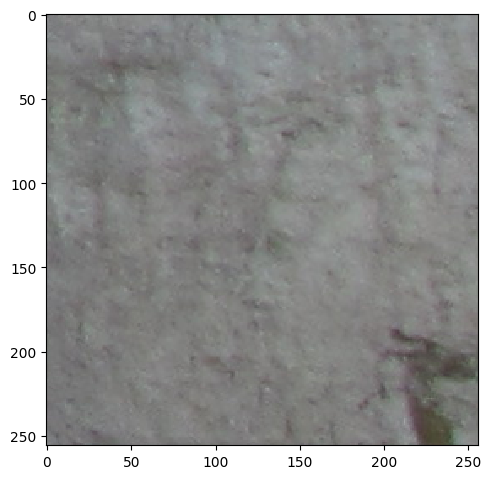

In [ ]:
# Showing the first image
plt.figure(figsize = (5,5))
io.imshow(imagen[0])

### Ground Truth computation

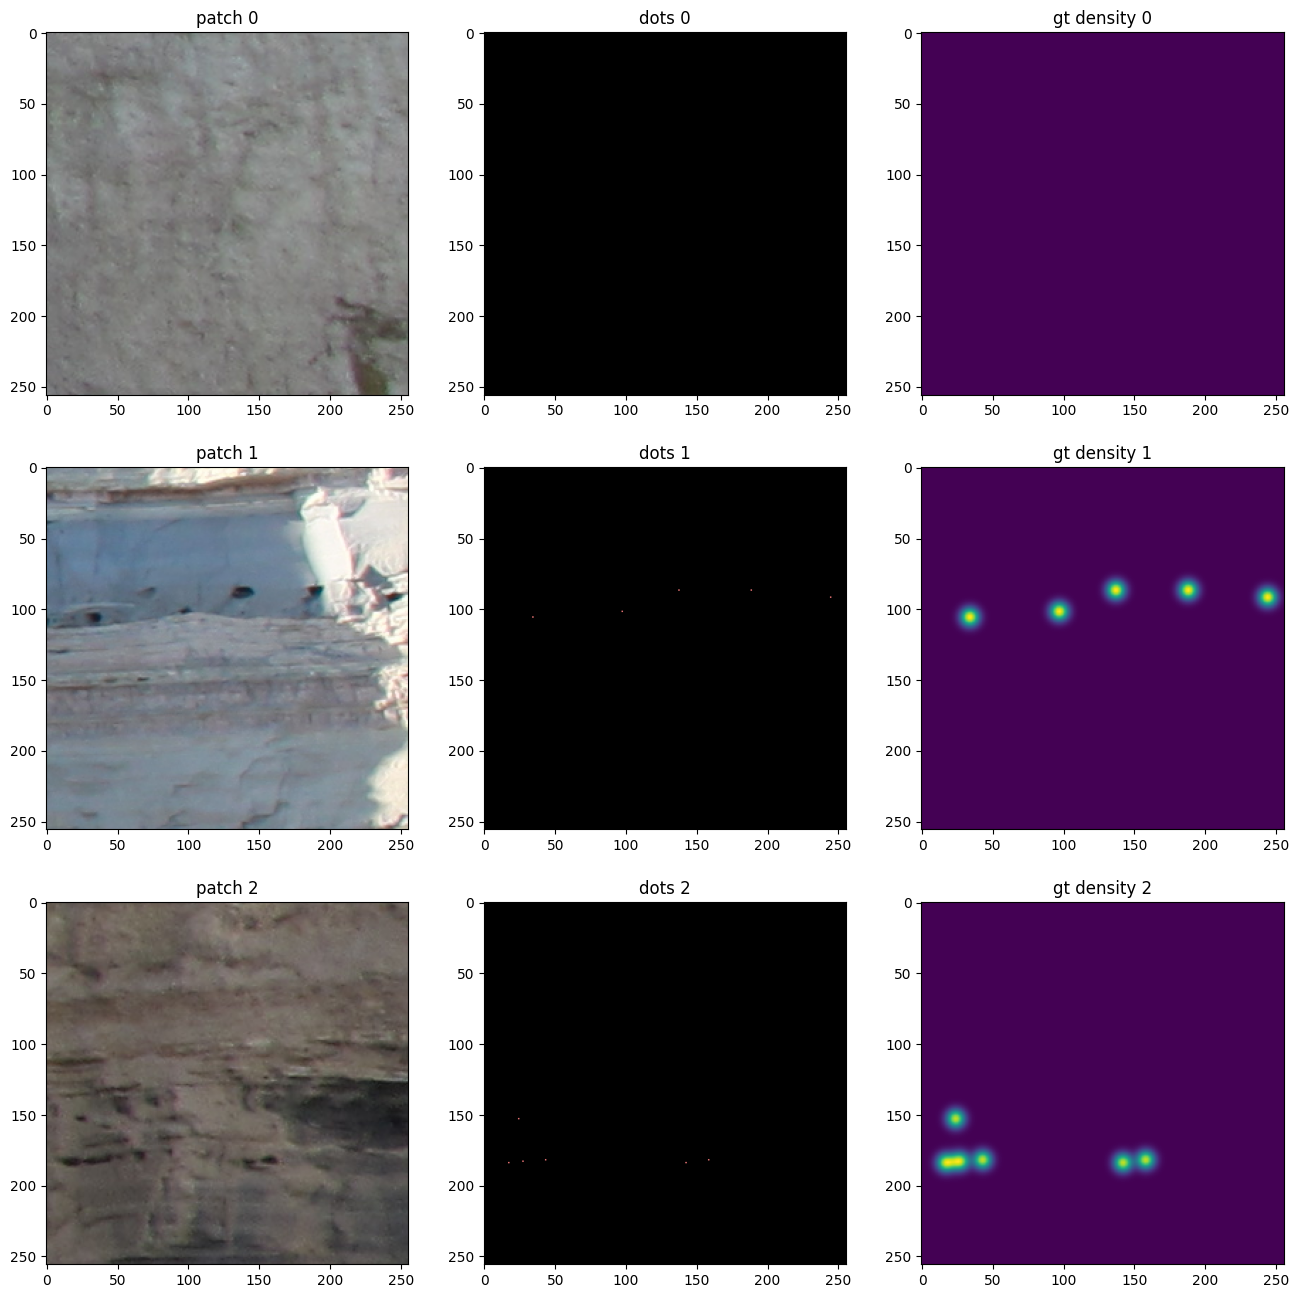

In [ ]:
# Applying the Gaussian Kernel on the points marked by the experts

from skimage.filters import gaussian

densidad_gt = np.zeros(shape=(qty,256,256))

for i in range(qty):

    densidad_gt[i,:,:] = gaussian(puntos[i][:,:,0], sigma=4.5)  # The scale of the Gaussian is a user parameter Sigma which should roughly match the object size.
                                                                # https://www.ilastik.org/documentation/counting/counting#sec_reference
                                                                # Points information in red channel [:,:,0]

# sigma = standard deviation for Gaussian kernel. The standard deviations of the Gaussian filter are given for each axis as a sequence,
# or as a single number, in which case it is equal for all axes.

fig, ax = plt.subplots(3,3, figsize=(16, 16))

# Inspecting the first 3 images:
for i in range(3):
    ax[i,0].imshow(imagen[i])
    ax[i,1].imshow(puntos[i])
    ax[i,2].imshow(densidad_gt[i])

    ax[i,0].set_title('patch ' + str(i))
    ax[i,1].set_title('dots ' + str(i))
    ax[i,2].set_title('gt density '+ str(i))

    plt.rcParams["axes.grid"] = False

plt.show()

In [ ]:
print(densidad_gt.min())
print(densidad_gt.max())

0.0
0.04827504360859346


### Selection of training and testing images

In [ ]:
# Number of training + validation images
N = 296

In [ ]:
## Training + Validation set

x_train = np.zeros(shape=(N,256,256,3))
y_train = np.zeros(shape=(N,256,256))


for i in range(N):

    x_train[i,:,:,:] = imagen[i]
    y_train[i,:,:] = densidad_gt[i]

# Testing set

inicio_test = N

rango_test = range(inicio_test, qty)
print('testing range:', rango_test)

x_test = np.zeros(shape=(qty-inicio_test,256,256,3))           # we use the 3 RGB channels
y_test = np.zeros(shape=(qty-inicio_test,256,256))

for i in rango_test:
    x_test[i-inicio_test,:,:,:]  = imagen[i]                   # we use the 3 RGB channels
    y_test[i-inicio_test,:,:]  = densidad_gt[i]

print('\n')
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

testing range: range(296, 312)


(296, 256, 256, 3)
(296, 256, 256)
(16, 256, 256, 3)
(16, 256, 256)


In [ ]:
y_train.max()

0.04827504360859346

In [ ]:
# It is important to scale the density kernels from 0.0-1.0 to something higher ( in this case 0.0-255.0),
# otherwise the network struggles to learn the very small target values produced by Gaussian convolution.
# These values are down-scaled subsequently to valid densities (0.0-1.0). https://github.com/dwaithe/U-net-for-density-estimation

densidad_aum      = np.zeros(shape=(N,256,256))
densidad_aum_test = np.zeros(shape=(qty-inicio_test,256,256))

factor = 255. / y_train.max()

for i in range(N):
    densidad_aum[i] = y_train[i] * factor

# test
for i in rango_test:
    densidad_aum_test[i-inicio_test] = y_test[i-inicio_test] * factor


print(factor)
print(densidad_aum.max())


5282.23241117088
255.0


In [ ]:
# Importing libraries

from keras import backend as K
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.layers import AveragePooling2D, GlobalAveragePooling2D, UpSampling2D, Reshape, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn.metrics import r2_score

In [ ]:
# Loss functions

def mae(y_true, y_pred):
    """
    Function to compute the loss of the neural network at the end of each epoch
    """
    return K.mean(abs(y_pred - y_true))

def rmse(y_true, y_pred):
    """
    Function to compute the loss of the neural network at the end of each epoch
    """
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# Metric

def r2(y_true, y_pred):
    """
    Function that defines r2 values as metric of the neural network at the end of each epoch
    """
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )


In [ ]:
def SqueezeAndExcite(inputs, ratio=8):
    init = inputs
    filters = init.shape[-1]
    se_shape = (1, 1, filters)

    se = GlobalAveragePooling2D()(init)
    se = Reshape(se_shape)(se)
    se = Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)
    x = init * se
    return x

In [ ]:
def ASPP(inputs):
    """ Image Pooling """
    shape = inputs.shape
    y1 = AveragePooling2D(pool_size=(shape[1], shape[2]))(inputs)
    y1 = Conv2D(256, 1, padding="same", use_bias=False)(y1)
    y1 = BatchNormalization()(y1)
    y1 = Activation("relu")(y1)
    y1 = UpSampling2D((shape[1], shape[2]), interpolation="bilinear")(y1)

    """ 1x1 conv """
    y2 = Conv2D(256, 1, padding="same", use_bias=False)(inputs)
    y2 = BatchNormalization()(y2)
    y2 = Activation("relu")(y2)

    """ 3x3 conv rate=6 """
    y3 = Conv2D(256, 3, padding="same", use_bias=False, dilation_rate=6)(inputs)
    y3 = BatchNormalization()(y3)
    y3 = Activation("relu")(y3)

    """ 3x3 conv rate=12 """
    y4 = Conv2D(256, 3, padding="same", use_bias=False, dilation_rate=12)(inputs)
    y4 = BatchNormalization()(y4)
    y4 = Activation("relu")(y4)

    """ 3x3 conv rate=18 """
    y5 = Conv2D(256, 3, padding="same", use_bias=False, dilation_rate=18)(inputs)
    y5 = BatchNormalization()(y5)
    y5 = Activation("relu")(y5)

    y = Concatenate()([y1, y2, y3, y4, y5])
    y = Conv2D(256, 1, padding="same", use_bias=False)(y)
    y = BatchNormalization()(y)
    y = Activation("relu")(y)

    return y

### DeepLabv3 architecture

In [ ]:
def deeplabv3_plus(shape):
    """ Input """
    inputs = Input(shape)

    """ Encoder """
    encoder = ResNet50(weights="imagenet", include_top=False, input_tensor=inputs)

    image_features = encoder.get_layer("conv4_block6_out").output
    x_a = ASPP(image_features)
    x_a = UpSampling2D((4, 4), interpolation="bilinear")(x_a)

    x_b = encoder.get_layer("conv2_block2_out").output
    x_b = Conv2D(filters=48, kernel_size=1, padding='same', use_bias=False)(x_b)
    x_b = BatchNormalization()(x_b)
    x_b = Activation('relu')(x_b)

    x = Concatenate()([x_a, x_b])
    x = SqueezeAndExcite(x)

    x = Conv2D(filters=256, kernel_size=3, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters=256, kernel_size=3, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = SqueezeAndExcite(x)

    x = UpSampling2D((4, 4), interpolation="bilinear")(x)
    x = Conv2D(1, 1)(x)
    x = Activation("relu")(x)

    model = Model(inputs, x)
    return model

In [ ]:
model = deeplabv3_plus((256, 256, 3))
model.compile(optimizer=Adam(learning_rate = 1e-4), loss = rmse, metrics=[r2])
model.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                             

In [ ]:
# Hyperparameters

NUM_EPOCHS = 40
BATCH_SIZE = 4
LOG_DIR    = BASE_FOLDER

print("Training now...")
H = model.fit(x_train, densidad_aum,
    batch_size=BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_split=0.15)

# https://github.com/keras-team/keras/issues/597
# The validation data is picked as the last 10% (for instance, if validation_split=0.9) of the input.
# The training data (the remainder) can optionally be shuffled at every epoch (shuffle argument in fit).
# That doesn't affect the validation data, obviously, it has to be the same set from epoch to epoch (François Chollet)

# Save model
print("\nSaving final model...")
model.save(LOG_DIR + 'loro_model_DeepLabv3.h5')

Training now...
Epoch 1/40
63/63 [==============================] - 73s 273ms/step - loss: 3.8310 - r2: -282976387072.0000 - val_loss: 4.9951 - val_r2: -7272268288.0000
Epoch 2/40
63/63 [==============================] - 8s 134ms/step - loss: 3.0041 - r2: -462476115968.0000 - val_loss: 4.9969 - val_r2: 0.0367
Epoch 3/40
63/63 [==============================] - 9s 136ms/step - loss: 2.7559 - r2: -29620516864.0000 - val_loss: 5.0085 - val_r2: -10411968512.0000
Epoch 4/40
63/63 [==============================] - 8s 135ms/step - loss: 2.4958 - r2: -124765372416.0000 - val_loss: 4.9969 - val_r2: 0.0367
Epoch 5/40
63/63 [==============================] - 9s 139ms/step - loss: 2.3195 - r2: -23393165312.0000 - val_loss: 4.9969 - val_r2: 0.0367
Epoch 6/40
63/63 [==============================] - 9s 137ms/step - loss: 2.1182 - r2: -36528746496.0000 - val_loss: 5.4615 - val_r2: -326868467712.0000
Epoch 7/40
63/63 [==============================] - 9s 139ms/step - loss: 2.0818 - r2: -306847416320.

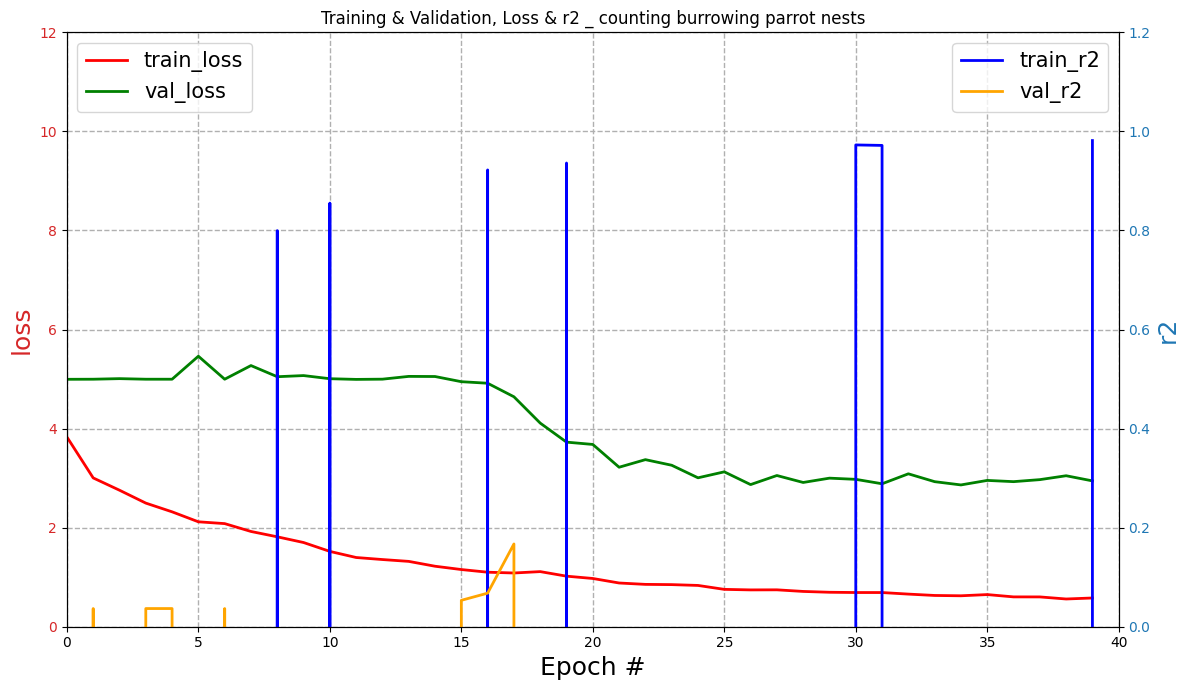

In [ ]:
# Plot

plt.rcParams["figure.figsize"] = (12,7)

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epoch #', fontsize=18)
ax1.set_ylabel('loss', color=color, fontsize=18)
ax1.set_xlim(0, NUM_EPOCHS)
ax1.set_ylim(0, 12)
ax1.plot(np.arange(0, NUM_EPOCHS), H.history["loss"], label="train_loss", c='red', linewidth='2')
ax1.plot(np.arange(0, NUM_EPOCHS), H.history["val_loss"], label="val_loss", c='green', linewidth='2')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(linestyle='dashed', linewidth='1')
ax1.legend(loc='upper left', fontsize=15)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('r2', color=color, fontsize=18)  # we already handled the x-label with ax1
ax2.set_ylim(0,1.2)
ax2.plot(np.arange(0, NUM_EPOCHS), H.history["r2"], label="train_r2", c='blue', linewidth='2')
ax2.plot(np.arange(0, NUM_EPOCHS), H.history["val_r2"], label="val_r2", c='orange', linewidth='2')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right', fontsize=15)

plt.title("Training & Validation, Loss & r2 _ counting burrowing parrot nests")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

### Testing the Model

In [ ]:
pred = model.predict(x_test, batch_size=BATCH_SIZE)      # delivers dimensions (qty-inicio_test, 256, 256, 1)
pred_ = np.squeeze(pred, axis=3)

print(N)
print(pred.shape)
print(pred_.shape)

4/4 [==============================] - 1s 57ms/step
296
(16, 256, 256, 1)
(16, 256, 256)


In [ ]:
lista_test = []

for i in rango_test:

    lista_test.append( r2_score(densidad_aum_test[i-inicio_test], pred_[i-inicio_test]))
    print('\nr2_score test image #',i,'=', r2_score(densidad_aum_test[i-inicio_test], pred_[i-inicio_test]))

print('\n\n############ mean testing r2_score = %.2f' %np.mean(lista_test) + '  ############')


r2_score test image # 296 = 0.8359375

r2_score test image # 297 = 0.6015625

r2_score test image # 298 = -4.841911938348198

r2_score test image # 299 = -3148.852541239823

r2_score test image # 300 = 0.66796875

r2_score test image # 301 = 0.796875

r2_score test image # 302 = 0.6338501066364376

r2_score test image # 303 = -22795.85203380953

r2_score test image # 304 = 0.84765625

r2_score test image # 305 = 0.12109375

r2_score test image # 306 = -208.0218902284611

r2_score test image # 307 = 0.2890625

r2_score test image # 308 = 0.6796875

r2_score test image # 309 = 0.6382650888980208

r2_score test image # 310 = 0.796875

r2_score test image # 311 = -51.46827754483879


############ mean testing r2_score = -1637.63  ############


## CNN DeepLabv3 gives us artificial density maps, we visualize them

In [ ]:
# First we de-scale the density maps to correct values, using the factor we had saved for it.

dens_pred_descaled = pred_ / factor

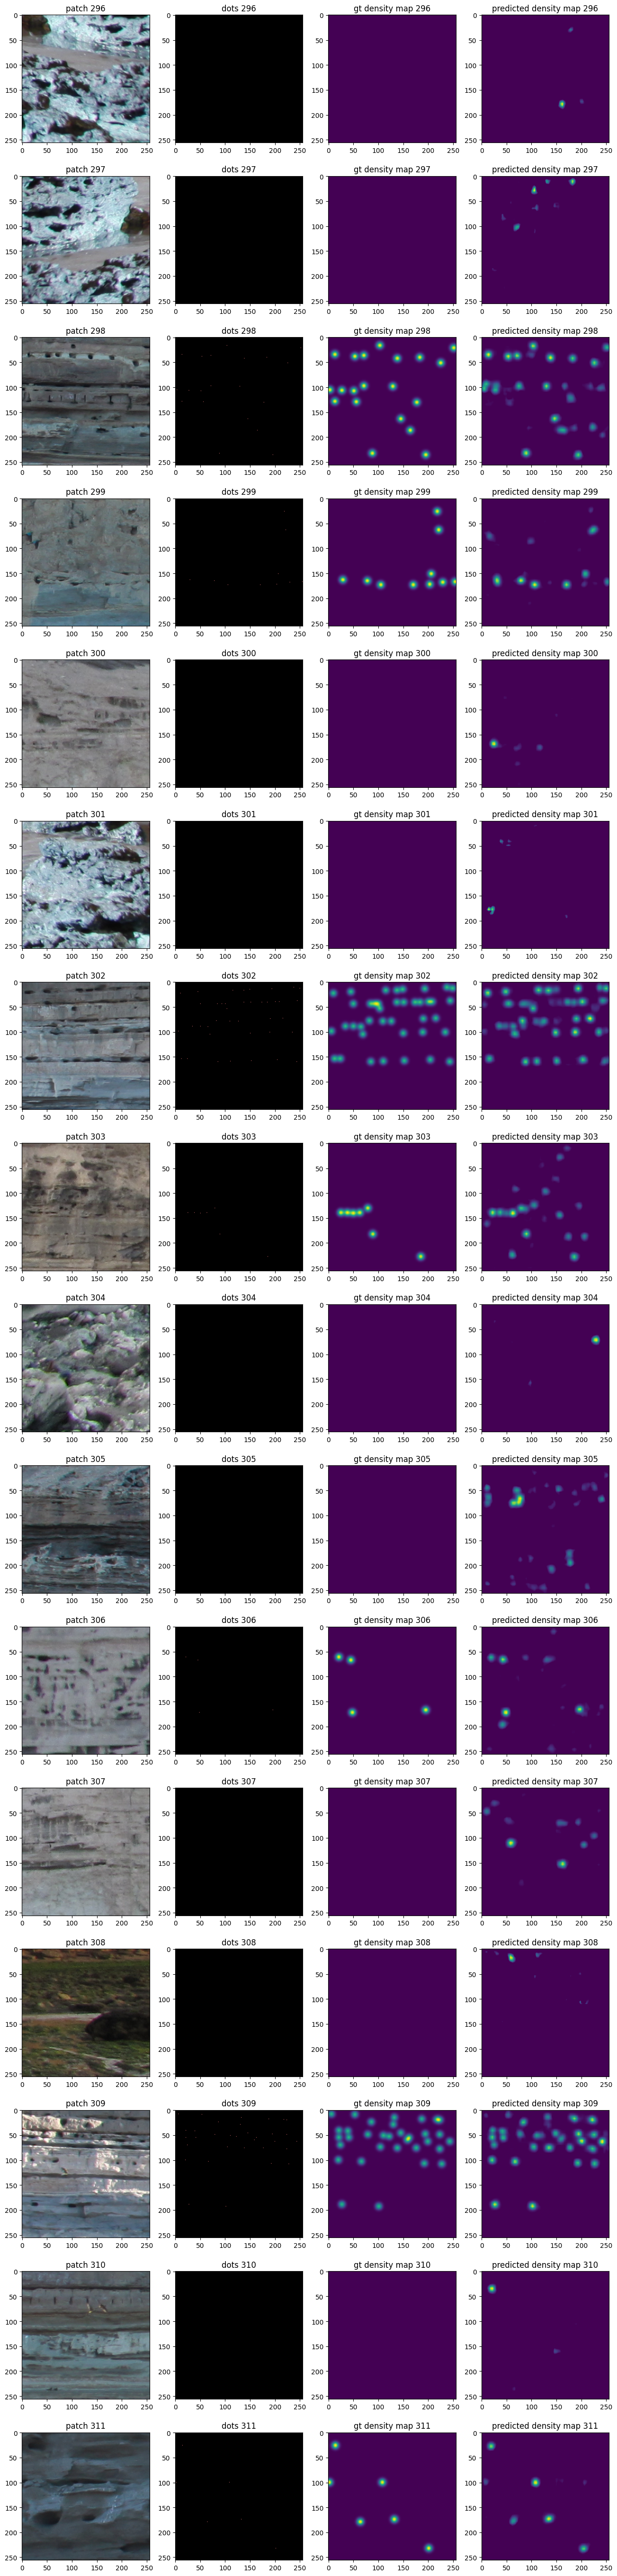

In [ ]:
fig, ax = plt.subplots(qty-N,4, figsize=(16, 70))

for i in range(N, qty):

    ax[i-N, 0].imshow(imagen[i])
    ax[i-N, 1].imshow(puntos[i])
    ax[i-N, 2].imshow(densidad_gt[i])
    ax[i-N, 3].imshow(dens_pred_descaled[i-N])


    ax[i-N, 0].set_title('patch ' + str(i))
    ax[i-N, 1].set_title('dots ' + str(i))
    ax[i-N, 2].set_title('gt density map '+ str(i))
    ax[i-N, 3].set_title('predicted density map '+ str(i))

plt.show()

## Counting the objects

In [ ]:
print(rango_test)

range(296, 312)


In [ ]:
# We show object counts over the real image, ground truth (density through Gaussian kernel),
# count over the density map estimated through the CNN model, and Error. We do it on the test images.

error = []
error_porcentual = []
error_absoluto = []

for i in rango_test:

    real     = puntos[i][:,:,0].sum()
    gt       = densidad_gt[i].sum()
    estimado = dens_pred_descaled[i-inicio_test].sum()

    print('\nActual count image %d                 = ' %i +  '%.0f' %real)
    print('Estimated count image %d              ='%i + ' %.0f' %estimado)
    error.append(estimado - real)


    error_absoluto.append(abs(estimado - real))
    print('Error (estimated vs actual)            = %.1f' %(estimado - real))


    error_porcentual.append( 100.*abs(estimado - real) / real)
    print('Percentage Error (estimated vs actual) = %.2f' %(100.*(estimado - real) / real) + '%')

print('\n\n######## Mean Absolute Error = %.1f' %(sum(error_absoluto)/len(rango_test)) + ' #######')
print('\n######## Percentage Mean Absolute Error = %.1f' %(sum(error_porcentual)/len(rango_test)) + '%' + ' #######' )

print('\n######## Maximum Absolute Error = %.1f' %max(error_absoluto) + ' #######')


Actual count image 296                 = 0
Estimated count image 296              = 0
Error (estimated vs actual)            = 0.2
Percentage Error (estimated vs actual) = inf%

Actual count image 297                 = 0
Estimated count image 297              = 0
Error (estimated vs actual)            = 0.3
Percentage Error (estimated vs actual) = inf%

Actual count image 298                 = 20
Estimated count image 298              = 19
Error (estimated vs actual)            = -0.6
Percentage Error (estimated vs actual) = -3.19%

Actual count image 299                 = 10
Estimated count image 299              = 8
Error (estimated vs actual)            = -2.3
Percentage Error (estimated vs actual) = -23.31%

Actual count image 300                 = 0
Estimated count image 300              = 1
Error (estimated vs actual)            = 1.2
Percentage Error (estimated vs actual) = inf%

Actual count image 301                 = 0
Estimated count image 301              = 0
Error (estima

<ipython-input-26-25a474a73647>:23: RuntimeWarning: divide by zero encountered in double_scalars
  error_porcentual.append( 100.*abs(estimado - real) / real)
<ipython-input-26-25a474a73647>:24: RuntimeWarning: divide by zero encountered in double_scalars
  print('Percentage Error (estimated vs actual) = %.2f' %(100.*(estimado - real) / real) + '%')
